## AutoML

For both binary classificationa and regression we are going to use the **water quality** dataset and for the multi class classification, **body performace data** will be used. Both tasks will be done with the help of H20 AutoML library.

#### With the dataset "Water Quality" we are going to perform the following tasks:

1.) Binary classification: Classify the water quality whether it is potable or not based on the features provided.

2.) Regression: Find out the pH value in the water with the help of fetures from the dataset.

#### With the dataset "Body Performance Data" we are going to perform the following task:

3.) Multiclass classification: Classify the human body inot multiple fitness levels such as Good, better, Average, Worst based on the features from data.

### Imports

In [279]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

### Load Data

In [280]:
water_df = pd.read_csv("water_potability.csv")

In [281]:
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Feature Description:

**1.) pH:** This features tells us whether the water is a base or an acid. pH value of 7 is considered as a neutral. Values grater than are base or alkaline. Values less than 7 are acids. As per WHO, the ideal range of pH for drinking water is 6.5 to 8.5

**2.) Hardness**: Hardness of water is mainly because of the presence of some of the metals like megnesium and calcium. They gets added into the water when it run through the ground. Hardness in water makes our skin itchy and hair might get affected at times.

0 to 17: Soft ||
17 to 60: Slightly hard ||
60 to 120: Moderately hard ||
120 to 180: Hard ||
Grater than 180: Very hard

**3.) Solids**: It is also called as TDS(Total Dissolved Solids), TDS means water has the ability to dissolve the in-organic and organic minerals salts like potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. The ideal range of TDS value for a drikable water is 500 mg/l to 1000 mg/l

**4.) Chloramines**: Chlorine and chloramines are used to disinfect the water. Upto 4 mg/l is a maximum for a drinking water.

**5.)Sulfate**: Salfates are naturally occuring substance generally found in all the natural things like rock, water and rocks. The ideal range of salfates for drinking water is 3 to 30 mg/l.

**6.)Conductivity**: Pure water is not a good conductor of electricity and it is a good insulator. So the EC(Electrical Conductivity) value should not exceed 400 μS/cm as per WHO.

**7.)Organic_carbon**: It is also called as TOC(Total Organic Carbon). It comes from decaying organic material in water and synthetic sources. According to US EPA < 2 mg/L as TOC is good for drinking water.

**8.)Trihalomethanes**: THMs are the byproduct of a chemical reaction of organic material in water with chlorine. THMs level of 80 ppm is considered as safe for the drinking.

**9.)Turbidity**: Turbidity is the maesure of solid particles in water when it is in the suspended state. WHO recommended value is 5 NTU(Nephelometric Turbidity Units)

**10.)Potability**: Potable means, whether water is safe for human consumption or not. 0 means not potable and 1 means potable.

## Binary classification:

### 1.) Is the relationship significant?

Lets look at the correlation heatmap to see how the features are correlated with each other

<AxesSubplot: >

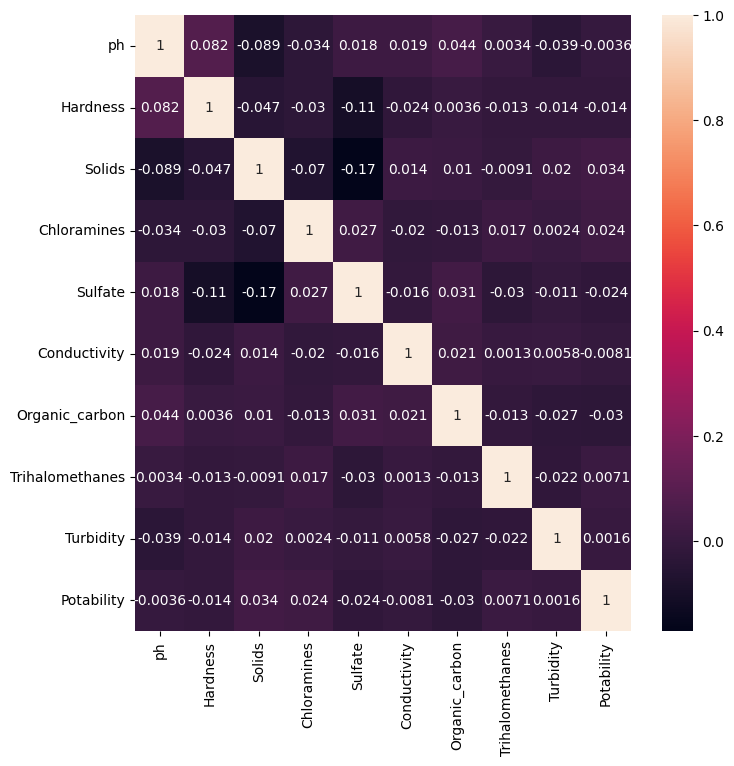

In [282]:
plt.figure(figsize = (8,8))
sns.heatmap(water_df.corr() , annot = True)

Looks like all the features are not at all correlated with the dependent variable. Lets sort all the features by theirr correlation values and see which varibale has the highest score.

In [283]:
round(abs(water_df.corr()['Potability']*100).sort_values(ascending=False), 2)

Potability         100.00
Solids               3.37
Organic_carbon       3.00
Chloramines          2.38
Sulfate              2.36
Hardness             1.38
Conductivity         0.81
Trihalomethanes      0.71
ph                   0.36
Turbidity            0.16
Name: Potability, dtype: float64

Feature solids has the highest correlation with the potability and it is a positive correlation.

### 2.) Are any model assumptions violated?

#### Assumption 1: Appropriate Outcome Type

Target variable is appropriate as shown in below. It has only two classes.

In [284]:
print(water_df['Potability'].nunique())

2


#### Assumption 2: Sufficiently large sample size

In [285]:
water_df.shape

(3276, 10)

We have sufficiently large sample size to solve this problem

#### Assumption 3: There are No Extreme Outliers

In [286]:
def find_outliers_extreme(df):
    q1=df.quantile(0.10)
    q3=df.quantile(0.90)
    extreme_ends=q3-q1
    outliers = df[((df<(q1-1.5*extreme_ends)) | (df>(q3+1.5*extreme_ends)))]
    return len(outliers)

data_dict = {}
cols = []
outliers_count = []
for col in water_df.columns:
    cols.append(col)
    outliers_count.append(find_outliers_IQR(water_df[col]))

data_dict['column'] = cols
data_dict['outliersCount'] = outliers_count
pd.DataFrame(data_dict)

,column,outliersCount
0,ph,0
1,Hardness,0
2,Solids,0
3,Chloramines,0
4,Sulfate,0
5,Conductivity,0
6,Organic_carbon,0
7,Trihalomethanes,0
8,Turbidity,0
9,Potability,0


From the above table we can observe that there are no extrme outliers in the data, hence this assumption has been passed

#### Assumption 4: Absence of multicollinearity

In [287]:
water_df.isnull().sum()
water_df = water_df.dropna()

In [288]:
water_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [289]:
water_df.dropna()
numeric_cols = water_df.columns

vif_df = water_df[numeric_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(20)

,feature,VIF
0,ph,20.433893
1,Hardness,31.194034
2,Solids,7.045481
3,Chloramines,19.385664
4,Sulfate,45.870016
5,Conductivity,25.955982
6,Organic_carbon,18.528872
7,Trihalomethanes,16.754027
8,Turbidity,23.997508
9,Potability,1.679804


From the above table we can see that there is a multicollinearity in most of the columns. This assumption has been failed

### 3.) Is there any multicollinearity in the model?

Yes, as per the VIF(Variance Inflation Factor) table above, most of the variables are having multicollinearity.

### 4.) In the multivariate models are predictor variables independent of all the other predictor variables?

No, multicollinearity exists between most of the features in the data

### 5.) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

<AxesSubplot: >

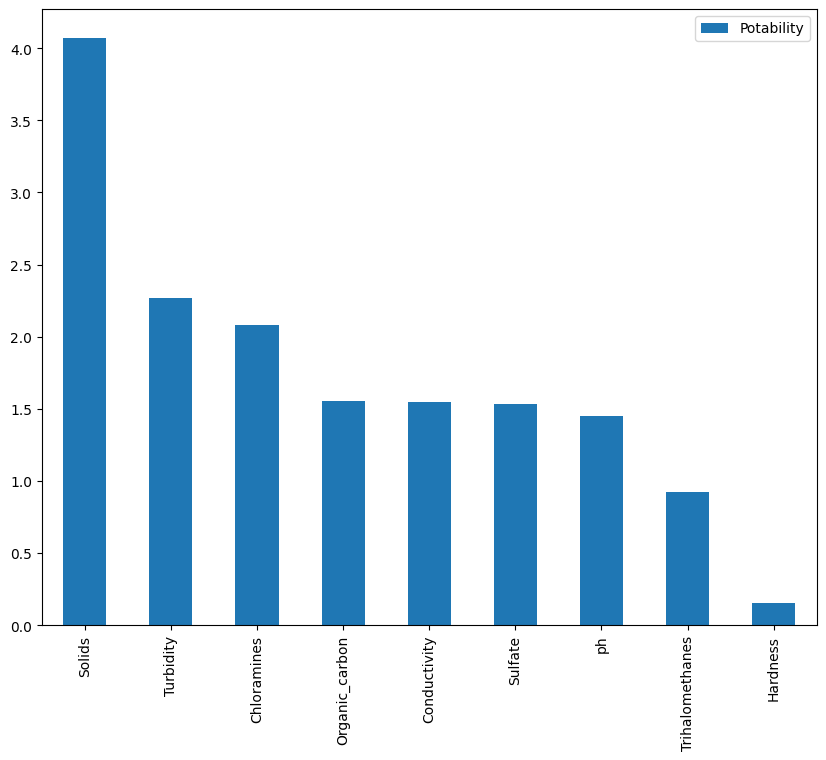

In [290]:
pd.DataFrame(abs(water_df.corr()['Potability'].drop('Potability')*100).sort_values(
    ascending=False)).plot.bar(figsize = (10,8))

In [291]:
round(abs(water_df.corr()['Potability']*100).sort_values(ascending=False), 2)

Potability         100.00
Solids               4.07
Turbidity            2.27
Chloramines          2.08
Organic_carbon       1.56
Conductivity         1.55
Sulfate              1.53
ph                   1.45
Trihalomethanes      0.92
Hardness             0.15
Name: Potability, dtype: float64

The most important independent variables are **Solids** and **Turbidity** and the least important ones are **ph**, **Trihalomethanes**, and **Hardness**

### 6.) Does the model make sense?

Lets start building a model with the help of autoML h2o framewrok

In [292]:
import h2o
print(h2o.__version__)
from h2o.automl import H2OAutoML

h2o.init(max_mem_size='16G')

3.38.0.2
Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 days 4 hours 13 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_nagavenkateshgavini_nnh2ex
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.77 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [293]:
water_df_h20 = h2o.import_file("water_potability.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [294]:
water_df_h20["Potability"] = water_df_h20["Potability"].asfactor()

In [295]:
df_train, df_test = water_df_h20.split_frame(ratios=[.8])

In [296]:
aml = H2OAutoML(max_runtime_secs=500, max_models=25, balance_classes=True, seed=1, verbosity="info", nfolds=5)

In [297]:
y = "Potability"
X = water_df_h20.columns
X.remove(y)

In [298]:
aml.train(x = X, y = y, training_frame = df_train)

AutoML progress: |
23:30:45.434: Project: AutoML_6_20221107_233045
23:30:45.436: Setting stopping tolerance adaptively based on the training frame: 0.019514284806274117
23:30:45.436: Build control seed: 1
23:30:45.438: training frame: Frame key: AutoML_6_20221107_233045_training_py_24_sid_8965    cols: 10    rows: 2626  chunks: 32    size: 231086  checksum: 4239711035085987680
23:30:45.438: validation frame: NULL
23:30:45.438: leaderboard frame: NULL
23:30:45.438: blending frame: NULL
23:30:45.438: response column: Potability
23:30:45.438: fold column: null
23:30:45.438: weights column: null
23:30:45.443: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w),

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: XRT_1_AutoML_6_20221107_233045


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    44                 44                          278345                 20           20           20            445           553           500.25

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.15123028168041372
RMSE: 0.38888337799450073
LogLoss: 0.4840811875931067
Mean Per-Class Error: 0.18599549405526428
AUC: 0.8775286331524649
AUCPR: 0.8886497700601096
Gini: 0.7550572663049298

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.425434599660242
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      1301  297   0.1859   (297.0/1598.0)
1      298   1303  0.1861   (298.0/1601.0)
Total  1599  1600  0.186    (595.0/3199.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.425435     0.814121  210
max f2                       0.222062     0.85045   314
max f0point5                 0.514101     0.844689  171
max accuracy                 0.459341     0.81588   193
max precision                0.915984     0.990566  14
max recall                   0.0387706    1         392
max specificity              1            0.999374  0
max absolute_mcc             0.495713     0.637078  178
max min_per_class_accuracy   0.425435     0.813866  210
max mean_per_class_accuracy  0.459341     0.815912  193
max tns                      1            1597      0
max fns                      1            1540      0
max fps                      0            1598      399
max tps                      0.0387706    1601      392
max tnr                      1            0.999374  0
max fnr                      1            0.961899  0
max fpr                      0            1         399
max tpr                      0.0387706    1         392

Gains/Lift Table: Avg response rate: 50.05 %, avg score: 46.18 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0193811                   1                  1.9659    1.9659             0.983871         1         0.983871                    1                   0.0381012       0.0381012                  96.5898   96.5898            0.0374754
2        0.0200063                   0.987035           1.99813   1.96691            1                0.989845  0.984375                    0.999683            0.00124922      0.0393504                  99.8126   96.6905            0.0387246
3        0.0325102                   0.916077           1.99813   1.97891            1                0.936002  0.990385                    0.97519             0.0249844       0.0643348                  99.8126   97.8913            0.063709
4        0.0431385                   0.90594            1.93936   1.96917            0.970588         0.908861  0.985507                    0.958848            0.0206121       0.0849469                  93.9358   96.9168            0.0836953
5        0.0518912                   0.893017           1.8554    1.94998            0.928571         0.896961  0.975904                    0.948409        

In [146]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XRT_1_AutoML_1_20221105_234509,0.667649,0.630545,0.574566,0.417148,0.468411,0.219409
GBM_5_AutoML_1_20221105_234509,0.664269,0.62638,0.566428,0.435662,0.46719,0.218267
DRF_1_AutoML_1_20221105_234509,0.663865,0.631541,0.564535,0.402275,0.469516,0.220446
GBM_2_AutoML_1_20221105_234509,0.659069,0.627291,0.564888,0.408341,0.467541,0.218595
GBM_grid_1_AutoML_1_20221105_234509_model_2,0.652973,0.631554,0.564842,0.429009,0.469354,0.220294
XGBoost_grid_1_AutoML_1_20221105_234509_model_3,0.648636,0.65522,0.54791,0.451252,0.477856,0.228346
XGBoost_grid_1_AutoML_1_20221105_234509_model_1,0.648126,0.643018,0.554922,0.431076,0.47384,0.224525
XGBoost_3_AutoML_1_20221105_234509,0.645541,0.663315,0.546491,0.422628,0.48292,0.233212
XGBoost_grid_1_AutoML_1_20221105_234509_model_5,0.640491,0.698125,0.532562,0.409461,0.490509,0.240599
XGBoost_grid_1_AutoML_1_20221105_234509_model_2,0.640288,0.672662,0.552311,0.472909,0.483882,0.234142


In [191]:
accuracy = aml.leader.model_performance(df_test).accuracy()

In [193]:
print(f"Accuracy on Test data: {round(accuracy[0][1]*100, 2)}%")

Accuracy on Test data: 65.88%


### 7.) Does regularization help?

### L1 Regularization and high penalty

In [184]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x = water_df.drop(['Potability'] , axis = 1).values
y = water_df['Potability' ].values

model = LogisticRegression(solver='liblinear', penalty="l1", C=0.001, random_state=10)
model.fit(x, y)

score_ = model.score(x, y)

In [185]:
score_

0.5967180507210343

### L1 Regularization and low penalty

In [186]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x = water_df.drop(['Potability'] , axis = 1).values
y = water_df['Potability' ].values

model = LogisticRegression(solver='liblinear', penalty="l1", C=100, random_state=10)
model.fit(x, y)

score_ = model.score(x, y)

In [187]:
score_

0.5982098458478369

By looking at the above scores, we can say that the regularization is not helping much with the data that we have, because the model scores are below 60. That tells us that the model is not overfitted.

### 8.) Which independent variables are significant?

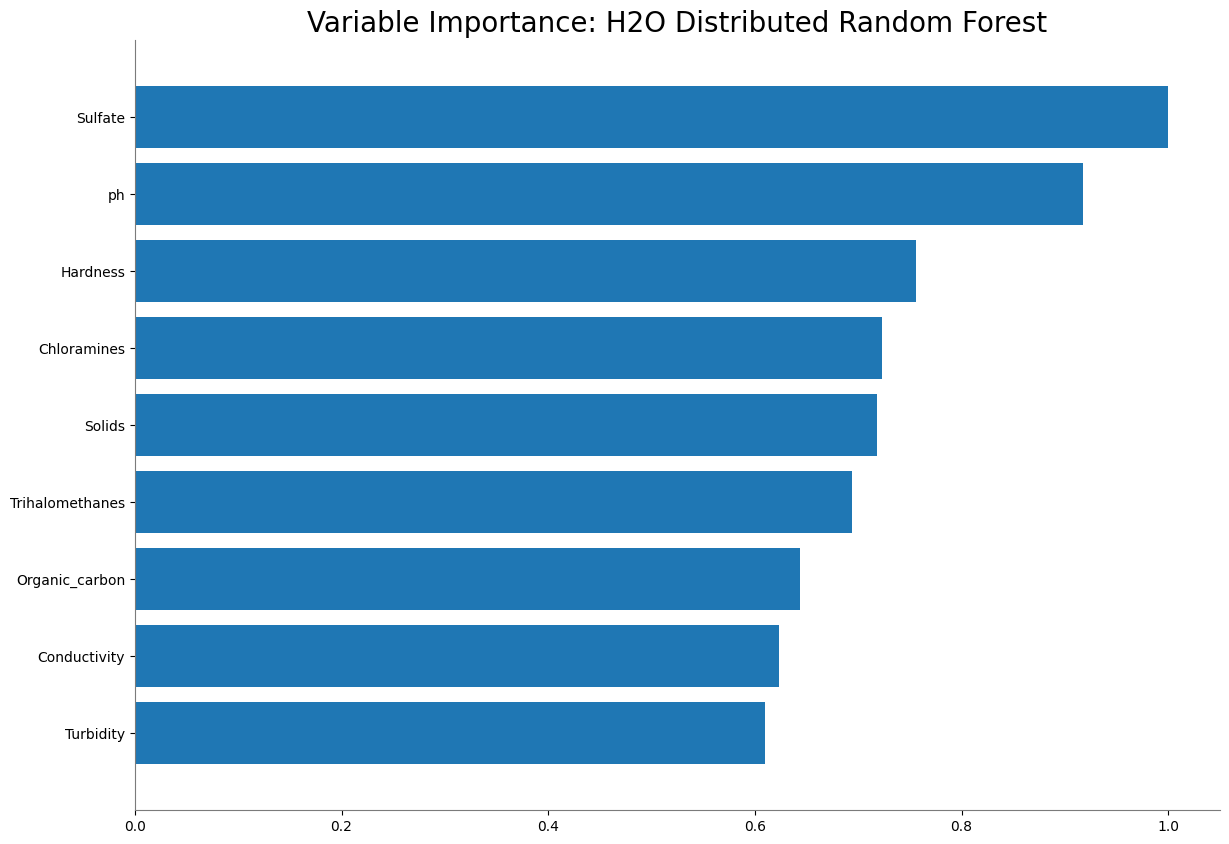

<Figure size 640x480 with 0 Axes>

In [166]:
aml.leader.varimp()
model = h2o.get_model("XRT_1_AutoML_1_20221105_234509")
model.varimp_plot(num_of_features=20)

From the above plot, we can say that the **Sulphates** and **pH** are the most important variables.

### 9.) Which hyperparameters are important?

Every algorithm that gets trained by the auto ML will have different hyperparameters, The mot important ones are, 

1. penalty and C for regularization.
2. num_epochs to specify the number of iterations that are required to be trained by a model.
3. gamma, max_depth, lambda and alpha are some of the hyperparamets important.



# Regression

### 1.) Is the relationship significant?

In [214]:
round(abs(water_df.corr()['Potability']*100).sort_values(ascending=False), 2)

Potability         100.00
Solids               4.07
Turbidity            2.27
Chloramines          2.08
Organic_carbon       1.56
Conductivity         1.55
Sulfate              1.53
ph                   1.45
Trihalomethanes      0.92
Hardness             0.15
Name: Potability, dtype: float64

Feature solids has the highest correlation with the potability and it is a positive correlation.

### 2.) Are any model assumptions violated?

For all the below assumptions, the code has been written in the binary classification section of this page.

**Assumption 1: Appropriate Outcome Type**

Assumption 1 assumption has been passed
    
**Assumption 2: Sufficiently large sample size**

Assumption 2 assumption has been passed
    
**Assumption 3: There are No Extreme Outliers**

Assumption3  assumption has beeen passed
    
**Assumption 4: Absence of multicollinearity**

Assumption 4 assumption has been failed

### 3.) Is there any multicollinearity in the model?

In [216]:
water_df.dropna()
numeric_cols = water_df.columns

vif_df = water_df[numeric_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(20)

,feature,VIF
0,ph,20.433893
1,Hardness,31.194034
2,Solids,7.045481
3,Chloramines,19.385664
4,Sulfate,45.870016
5,Conductivity,25.955982
6,Organic_carbon,18.528872
7,Trihalomethanes,16.754027
8,Turbidity,23.997508
9,Potability,1.679804


Yes, as per the VIF(Variance Inflation Factor) table above, most of the variables are having multicollinearity.

### 4.) In the multivariate models are predictor variables independent of all the other predictor variables?

No, there is a multi collinearity exists in the data as per the above VIF table.

### 5.) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

<AxesSubplot: >

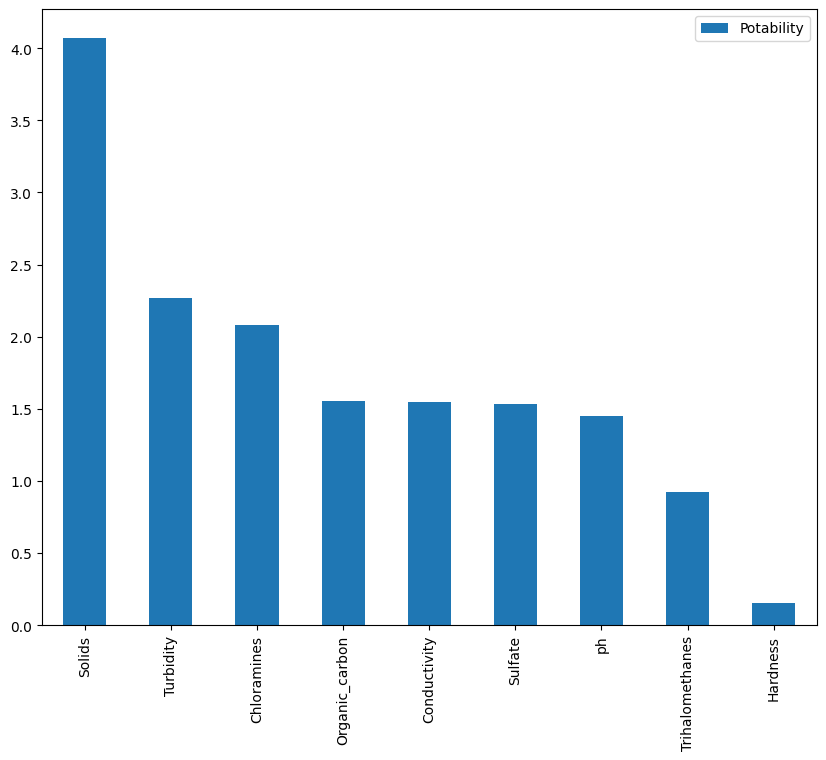

In [219]:
pd.DataFrame(abs(water_df.corr()['Potability'].drop('Potability')*100).sort_values(
    ascending=False)).plot.bar(figsize = (10,8))

### 6.) Does the model make sense?

In [220]:
y = "ph"
X = water_df_h20.columns
X.remove(y)

In [221]:
aml.train(x = X, y = y, training_frame = df_train)

AutoML progress: |
20:24:48.827: Project: AutoML_1_20221105_234509
20:24:48.835: Setting stopping tolerance adaptively based on the training frame: 0.01960407493444558
20:24:48.835: Build control seed: 1
20:24:48.867: training frame: Frame key: AutoML_2_20221107_202448_training_py_3_sid_b9e0    cols: 10    rows: 2602  chunks: 32    size: 229358  checksum: -6967589197701490121
20:24:48.867: validation frame: NULL
20:24:48.867: leaderboard frame: NULL
20:24:48.867: blending frame: NULL
20:24:48.867: response column: ph
20:24:48.867: fold column: null
20:24:48.867: weights column: null
20:24:48.886: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_2 (

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,1.173963,0.0817480,1.2436366,1.1108927,1.2347535,1.2175064,1.0630256
mean_residual_deviance,2.3272674,0.2734223,2.7026348,2.1531234,2.426908,2.3673935,1.9862778
mse,2.3272674,0.2734223,2.7026348,2.1531234,2.426908,2.3673935,1.9862778
null_deviance,1644.0034,263.939,2081.4165,1448.5021,1703.8302,1494.1272,1492.1411
r2,0.0712046,0.0133633,0.0519417,0.0673838,0.0742328,0.0735389,0.0889255
residual_deviance,1023.3648700,138.00279,1232.4015,960.293,1065.4126,996.67267,862.04456
rmse,1.5234325,0.0895879,1.6439692,1.4673525,1.5578537,1.5386337,1.4093537
rmsle,0.2050101,0.0136001,0.2233049,0.2026228,0.2112279,0.2015636,0.1863310


In [222]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20221107_202448,1.52575,2.32791,1.1727,0.205524,2.32791
StackedEnsemble_BestOfFamily_1_AutoML_2_20221107_202448,1.53359,2.3519,1.17981,0.206575,2.3519
GBM_grid_1_AutoML_2_20221107_202448_model_19,1.53714,2.36281,1.18183,0.206853,2.36281
GBM_grid_1_AutoML_2_20221107_202448_model_32,1.54015,2.37207,1.18444,0.20734,2.37207
GBM_3_AutoML_2_20221107_202448,1.54048,2.37308,1.18149,0.207024,2.37308
GBM_2_AutoML_2_20221107_202448,1.54188,2.37741,1.18093,0.207584,2.37741
GBM_5_AutoML_2_20221107_202448,1.54735,2.39429,1.18732,0.208336,2.39429
GBM_grid_1_AutoML_2_20221107_202448_model_30,1.54826,2.39709,1.18795,0.208065,2.39709
GBM_4_AutoML_2_20221107_202448,1.54907,2.39962,1.18414,0.208328,2.39962
GBM_grid_1_AutoML_2_20221107_202448_model_28,1.5518,2.40808,1.19697,0.208615,2.40808


From the h20 Auto ML **StackedEnsemble_AllModels_1_AutoML_2_20221107_202448** is the best model for the regression problem

### 7.) Does regularization help?

Yes, significantly reduces the variance of the model, without substantial increase in the bias.

### 8.) Which independent variables are significant?

Solids is the most significant varaibles among others

### 9.) Which hyperparameters are important?

Every algorithm that gets trained by the auto ML will have different hyperparameters, The mot important ones are, 

1. penalty and C for regularization.
2. num_epochs to specify the number of iterations that are required to be trained by a model.
3. gamma, max_depth, lambda and alpha are some of the hyperparamets important.



# Multiclass classification

### Load Data

In [237]:
body_df = pd.read_csv("bodyPerformance.csv")

In [248]:
body_df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


### 1.) Is the relationship significant?

Lets look at the correlation heatmap to see how the features are correlated with each other

<AxesSubplot: >

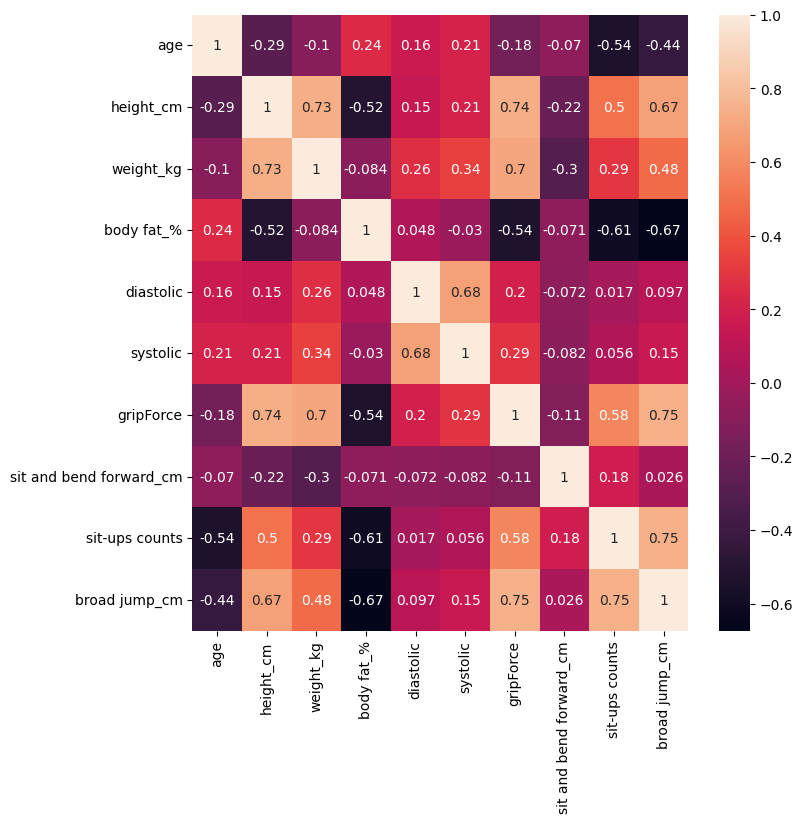

In [238]:
plt.figure(figsize = (8,8))
sns.heatmap(water_df.corr() , annot = True)

From the above table we are not able to check the correlation between target and independent. Here the target is the **class** variable.

To see the correlation, we have to first encode the target with dummy variables. This will be taken care by the auto ML framework itself.

### 2.) Are any model assumptions violated?

Only the multi collinearity model assumption has been failed.

### 3.) Is there any multicollinearity in the model?

Yes, there is a multi collinearity exists in the data, which will be handled by the regularization in auto ML

### 4.) In the multivariate models are predictor variables independent of all the other predictor variables?

No, there is a presence of multi collinearity in the data.

### 5.) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Most significant one is **weight**, **sit and bend forward_cm** and **sit_ups_count**.

### 6.) Does the model make sense?

In [257]:
body_df_h20 = h2o.import_file("bodyPerformance.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [258]:
body_df_h20["class"] = body_df_h20["class"].asfactor()

In [259]:
df_train, df_test = body_df_h20.split_frame(ratios=[.8])

In [269]:
aml = H2OAutoML(max_runtime_secs=500, max_models=25, balance_classes=True, seed=1, verbosity="info", nfolds=5)

In [270]:
y = "class"
X = list(body_df.columns)
X.remove(y)

In [271]:
aml.train(x = X, y = y, training_frame = df_train)

AutoML progress: |
23:10:54.13: Project: AutoML_5_20221107_231054
23:10:54.14: Setting stopping tolerance adaptively based on the training frame: 0.009676865543833981
23:10:54.14: Build control seed: 1
23:10:54.15: training frame: Frame key: AutoML_5_20221107_231054_training_py_16_sid_b9e0    cols: 12    rows: 10679  chunks: 32    size: 264790  checksum: 3912973942003135920
23:10:54.15: validation frame: NULL
23:10:54.15: leaderboard frame: NULL
23:10:54.15: blending frame: NULL
23:10:54.15: response column: class
23:10:54.15: fold column: null
23:10:54.15: weights column: null
23:10:54.17: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_2 (5g, 30

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_5_20221107_231054_model_4


Model Summary: 
    number_of_trees
--  -----------------
    44

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.053735194314677895
RMSE: 0.23180852942607158
LogLoss: 0.20882495166879378
Mean Per-Class Error: 0.026191714295059107
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
A     B     C     D     Error       Rate
----  ----  ----  ----  ----------  ------------
2642  8     2     0     0.00377074  10 / 2,652
81    2583  5     5     0.0340314   91 / 2,674
58    57    2549  1     0.0435272   116 / 2,665
15    26    22    2625  0.0234375   63 / 2,688
2796  2674  2578  2631  0.0262197   280 / 10,679

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.97378
2    0.997472
3    0.999906
4    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.2089779747703038
RMSE: 0.45714108847302687
LogLoss: 0.6410425138892596
Mean Per-Class Error: 0.25690365568782597
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
A     B     C     D     Error     Rate
----  ----  ----  ----  --------  --------------
2252  341   53    6     0.15083   400 / 2,652
567   1662  372   73    0.378459  1,012 / 2,674
208   504   1796  157   0.326079  869 / 2,665
36    152   275   2225  0.172247  463 / 2,688
3063  2659  2496  2461  0.256953  2,744 / 10,679

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.743047
2    0.927802
3    0.987078
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.743048  0.00658764  0.739232      0.734082      0.745787      0.74485       0.751288
auc                      nan       0           nan           nan           nan           nan           nan
err                      0.256952  0.00658764  0.260768      0.265918      0.254213      0.25515       0.248712
err_count                548.8     14.1492     557           568           543           545           531
logloss                  0.641042  0.0139897   0.642947      0.664077      0.633084      0.628019      0.637082
max_per_class_error      0.378313  0.0101367   0.370968      0.38806       0.3898        0.375472      0.367265
mean_per_class_accuracy  0.743152  0.00627841  0.741429      0.7334        0.745948      0.744833      0.750149
mean_per_class_error     0.256848  0.00627841  0.258571      0.2666        0.254052      0.255167      0.249851
mse                      0.208978  0.00465334  0.210641      0.216303      0.206529      0.206893      0.204523
pr_auc                   nan       0           nan           nan           nan           nan           nan
r2                       0.832804  0.00421912  0.828895      0.82772       0.836604      0.834357      0.836441
rmse                     0.457118  0.00507013  0.458956      0.465084      0.454454      0.454855      0.452242

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    t

### 7.) Does regularization help?

Yes, significantly reduces the variance of the model, without substantial increase in the bias.

### 8.) Which independent variables are significant?

**sit and bend forward_cm** and **sit-ups counts** are the most important independent variables

### 9.) Which hyperparameters are important?

Every algorithm that gets trained by the auto ML will have different hyperparameters, The mot important ones are, 

1. penalty and C for regularization.
2. num_epochs to specify the number of iterations that are required to be trained by a model.
3. gamma, max_depth, lambda and alpha are some of the hyperparamets important.



## Conclusion

After data analysis, from the water_potability data set we can observe that the the potability is affected byt the presence of solids and pH content in the water.

Where for the body performance data, the weight has been significantly affected the people with their fitness levels.

## References

Refered the following links to understand the functions or the processes that are going to be required during the problem analysis.

1. Scikit-learn Documentation

2. Pandas Official Documentation

3. Analytics Vidya

4. medium: towardsdatascience

5. Seaborn: statistical data visualization

All the visualization code was referred form the seaborn and scikit-learn official documentations. Data frame functions and usage was referred from the Pandas official documentation. All the concepts and doubts in the machine learning cleared with the help of medium(towardsdatascience) and analytics vidya articles. Rest of the code is written individually. pep8 code was followed for all the code snippets.

## Copyright

Copyright 2022 Naga Venkatesh Gavini

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.